# GIỚI THIỆU THƯ VIỆN SEABORN

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import seaborn as sns
%matplotlib inline

In [33]:
sns.__version__

'0.12.2'

In [55]:
# load in data and save to a variable
#df = seaborn.load_dataset("tips")
df=pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   fraction    244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.4+ KB


### Swarm plots

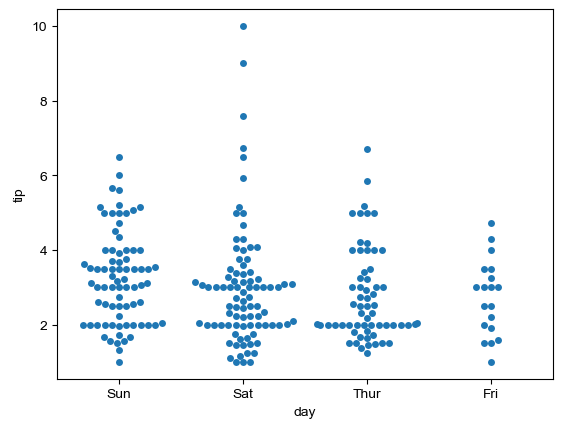

In [4]:
import warnings
warnings.filterwarnings('ignore')
seaborn.swarmplot(x="day", y="tip", data=df)
seaborn.set_style("whitegrid")
plt.show()

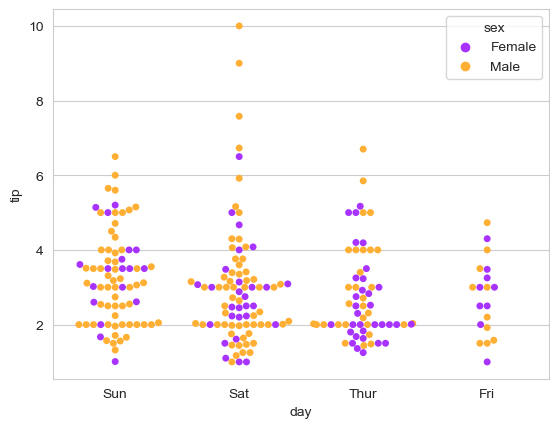

In [5]:
gender_palette = ["#A833FF", "#FFAF33"]
seaborn.swarmplot(x="day", y="tip", hue="sex", palette=gender_palette, data=df)
plt.show()

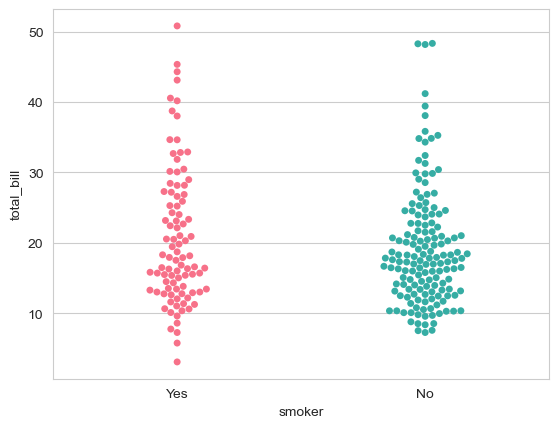

In [6]:
seaborn.swarmplot(x="smoker", y="total_bill", 
                  data=df, palette="husl", order=["Yes", "No"])
plt.show()

### Violin Plots

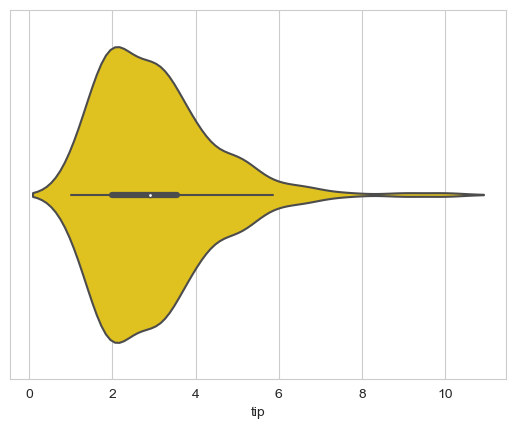

In [7]:
seaborn.violinplot(x = df["tip"], color="gold")
plt.show()

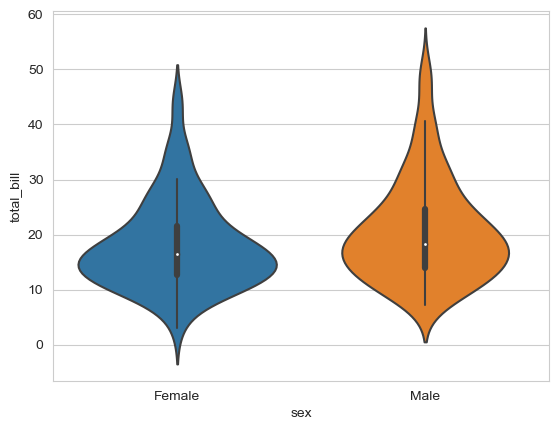

In [8]:
seaborn.violinplot(x = "sex",y ="total_bill",data=df)
plt.show()

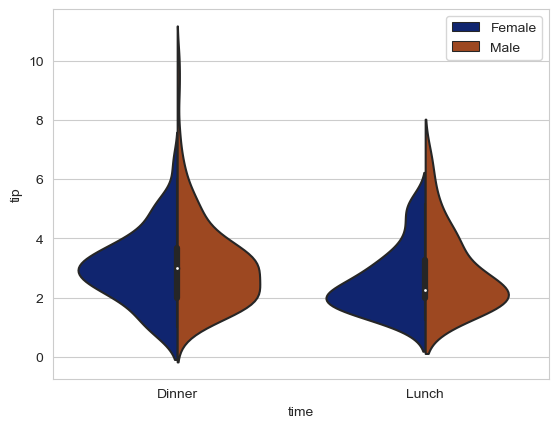

In [9]:
seaborn.violinplot(x = "time",y ="tip",data=df, 
                   hue ="sex",palette ="dark",split = True)
plt.legend()
plt.show()

### Facet Grids

In [10]:
import pandas as pd
pd.DataFrame.iteritems = pd.DataFrame.items

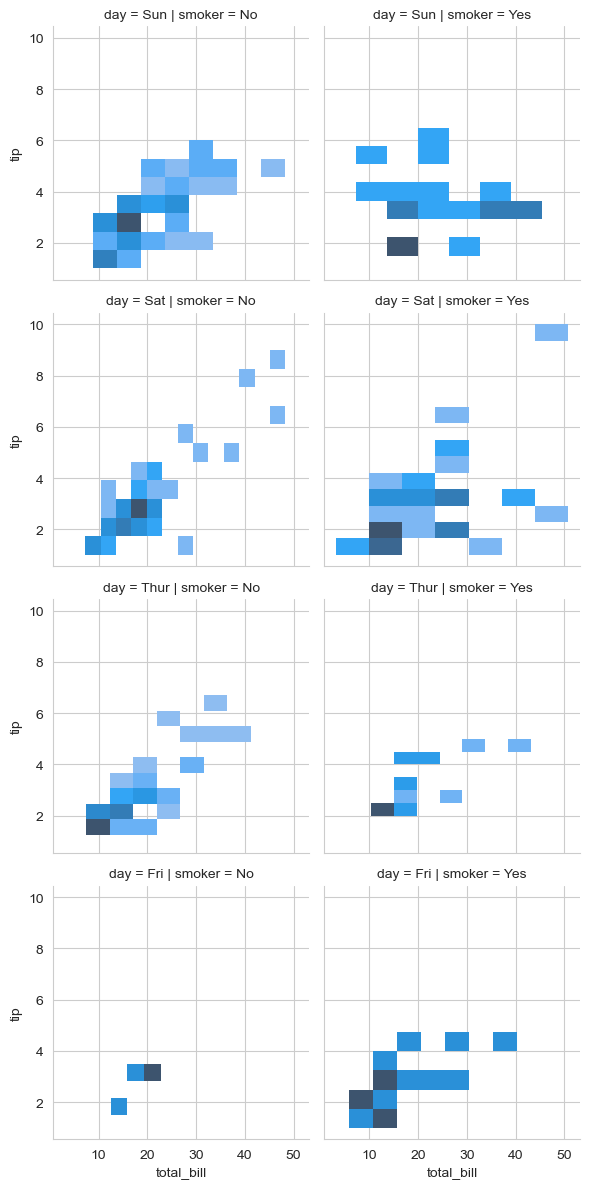

In [11]:
g = sns.FacetGrid(df, col="smoker",  row="day")
g.map(sns.histplot, "total_bill", "tip")

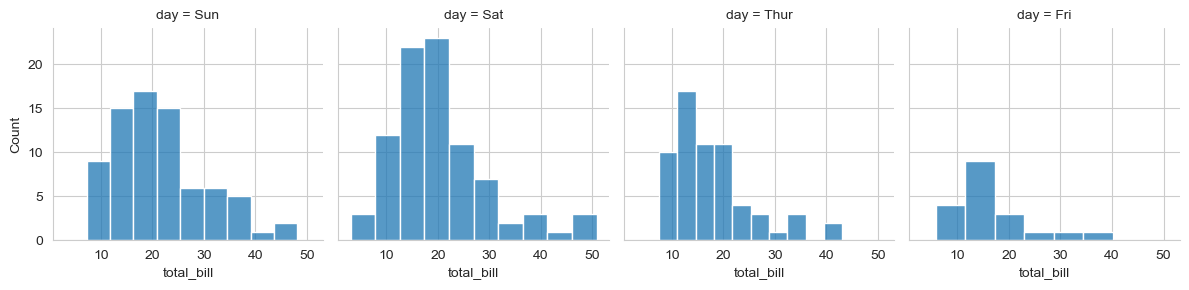

In [13]:
g = sns.FacetGrid(col="day",data=df)
g.map(sns.histplot, "total_bill")

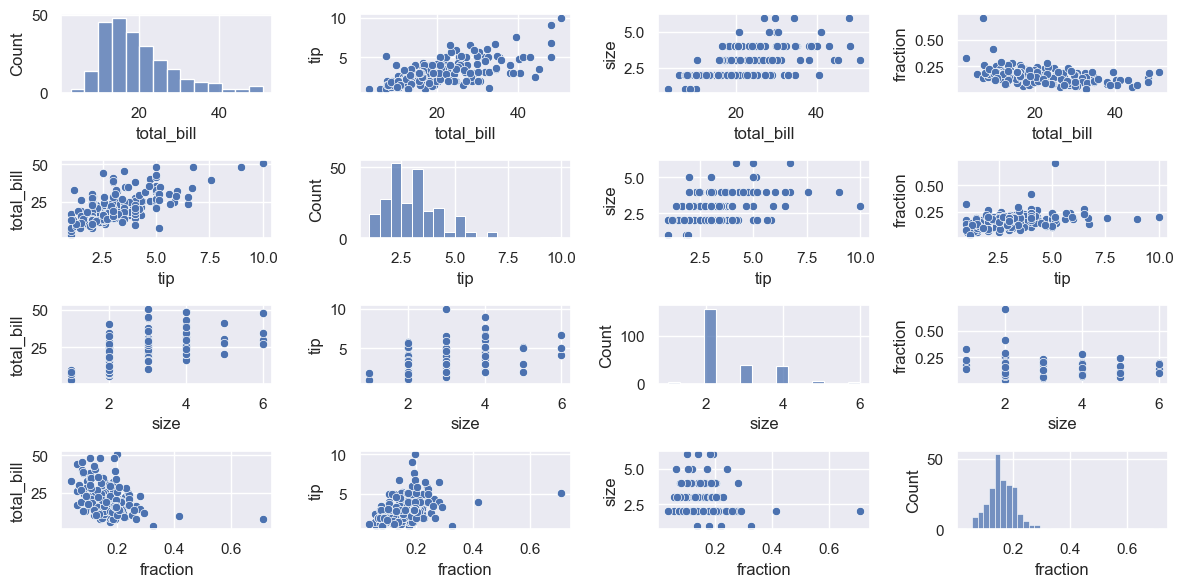

In [36]:
columns=['total_bill','tip','size','fraction']
fig,axes=plt.subplots(4,4,figsize=(12,6))
for i,column1 in enumerate(columns):
    for j,column2 in enumerate(columns):
        if i==j :
            sns.histplot(
                data=df,
                x=column1,
                ax=axes[i,j]
            )
        if i!=j:
            sns.scatterplot(
                data=df,
                x=column1,
                y=column2,
                ax=axes[i,j]
            )
plt.tight_layout()
plt.show()

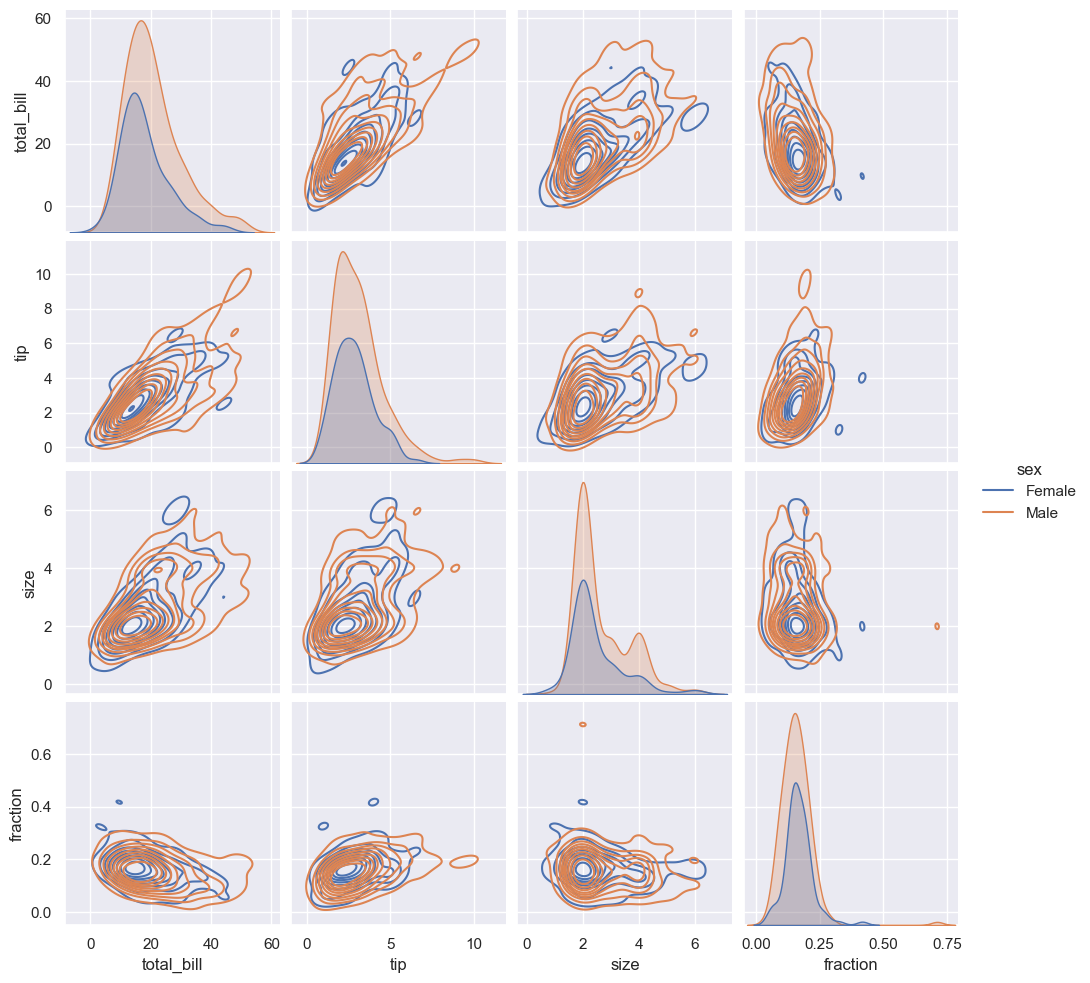

In [44]:
sns.pairplot(
    data=df,
    hue='sex',
    markers='^',
    kind='kde'
)

plt.show()

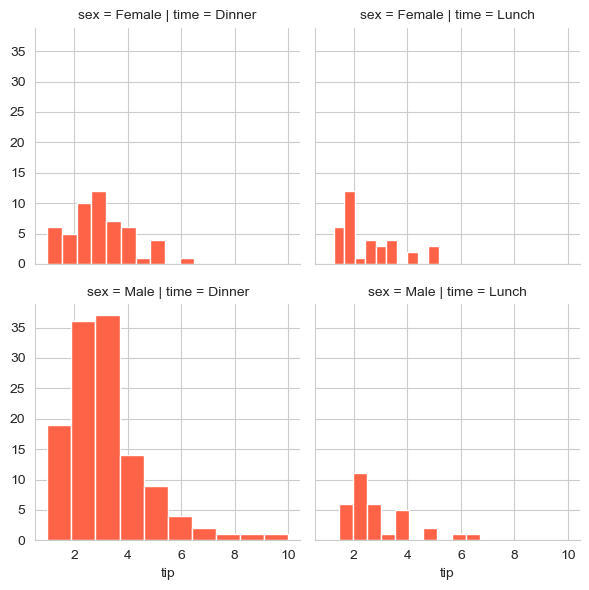

In [14]:
fg = seaborn.FacetGrid(df,col = "time",row = "sex")
fg = fg.map(plt.hist,"tip", color ="tomato")

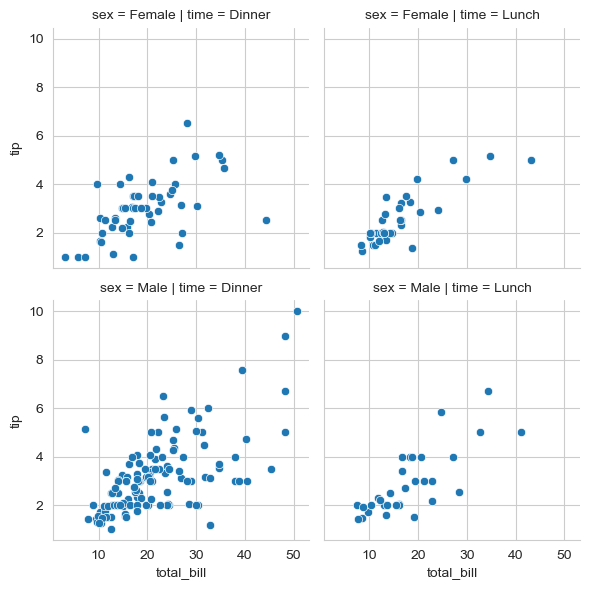

In [15]:
g = sns.FacetGrid(df, col="time",  row="sex")
g.map(sns.scatterplot, "total_bill", "tip")

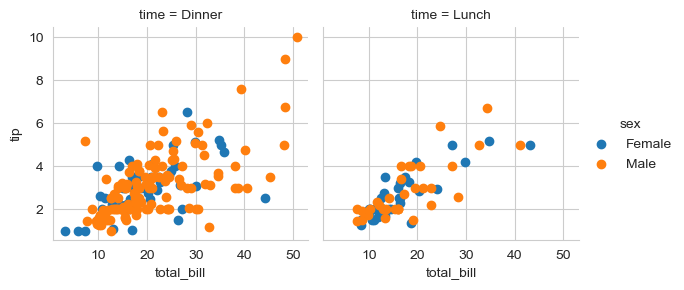

In [16]:
x = seaborn.FacetGrid(df, col="time", hue="sex")
x = x.map(plt.scatter,"total_bill","tip")
x =x.add_legend()

### Heat Maps

[[0.20708127 0.75813672 0.00557896]
 [0.76624262 0.47805388 0.99685627]
 [0.30592445 0.62189808 0.17405182]
 [0.63615419 0.95979831 0.49310385]
 [0.5885521  0.52309348 0.0237806 ]]


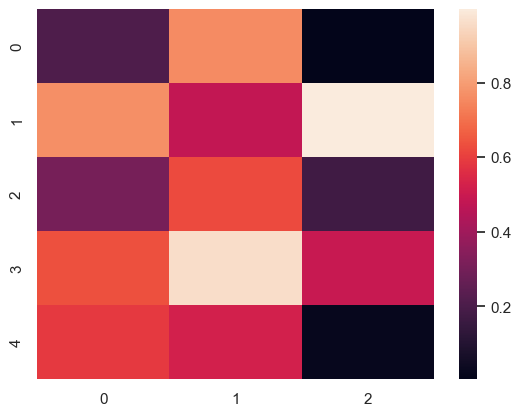

In [45]:
uniform_data = np.random.rand(5, 3) # five rows, 3 columns
print(uniform_data)
seaborn.heatmap(uniform_data)
plt.show()

In [46]:
flights = seaborn.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [49]:
flights_pivot = flights.pivot(index="year", columns="month", values="passengers")
flights_pivot.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


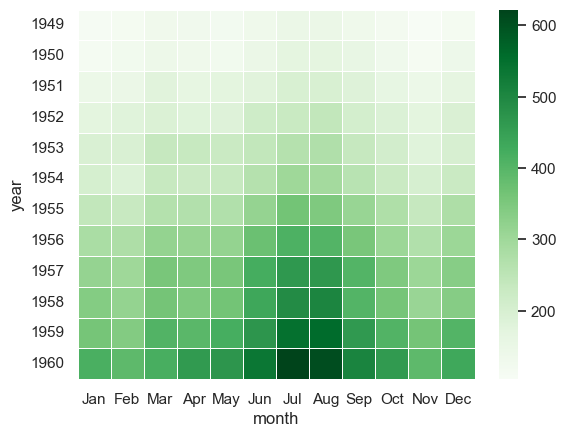

In [51]:
# draw border
x = seaborn.heatmap(flights_pivot, linewidths=0.5,cmap='Greens')

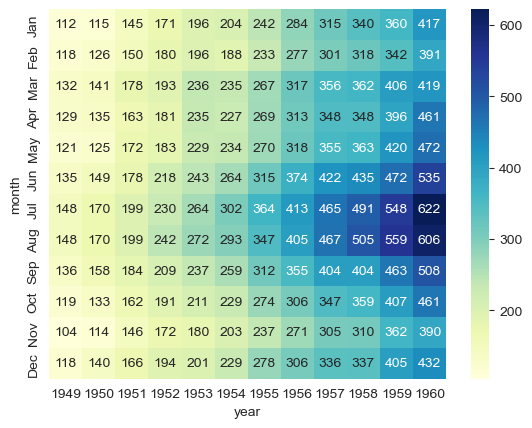

In [21]:
x = seaborn.heatmap(flights_pivot, annot=True, fmt="d", cmap="YlGnBu")

In [52]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,fraction
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808


In [70]:
df[['day','sex','total_bill']].head()

,day,sex,total_bill
0,Sun,Female,16.99
1,Sun,Male,10.34
2,Sun,Male,21.01
3,Sun,Male,23.68
4,Sun,Female,24.59


In [61]:
a=df.groupby(['sex','day'])['total_bill'].sum().reset_index()
a

,sex,day,total_bill
0,Female,Fri,127.31
1,Female,Sat,551.05
2,Female,Sun,357.70
3,Female,Thur,534.89
4,Male,Fri,198.57
5,Male,Sat,1227.35
6,Male,Sun,1269.46
7,Male,Thur,561.44


In [71]:
df1=pd.pivot_table(data=a,index='day',columns='sex',values='total_bill')
df1

sex,Female,Male
day,,
Fri,127.31,198.57
Sat,551.05,1227.35
Sun,357.70,1269.46
Thur,534.89,561.44


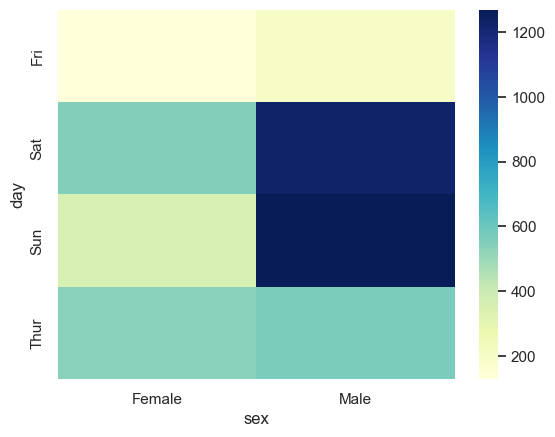

In [73]:
sns.heatmap(data=df1, cmap="YlGnBu")
plt.show()

### Box plot

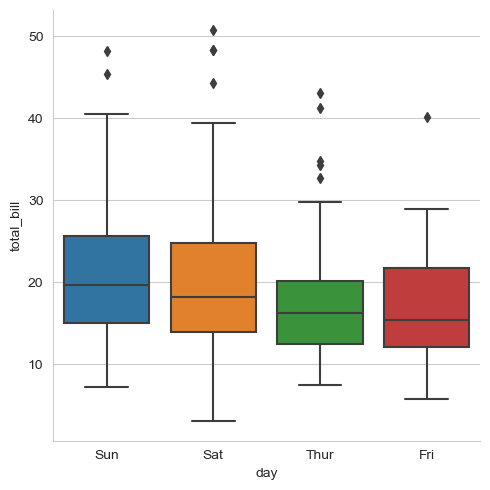

In [22]:
sns.catplot(data=df, x="day", y="total_bill", kind="box")

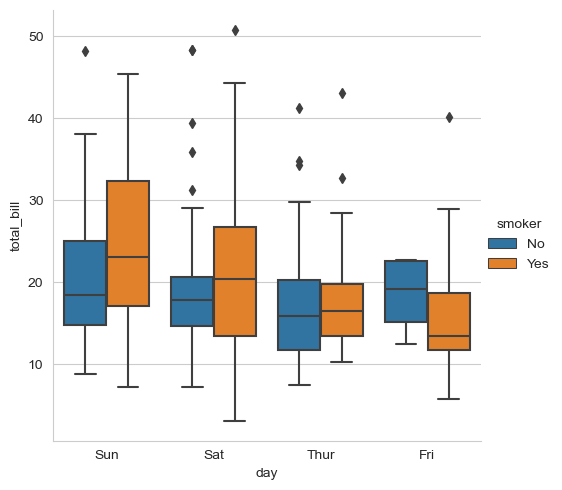

In [23]:
sns.catplot(data=df, x="day", y="total_bill", hue="smoker", kind="box")

### Bar plot

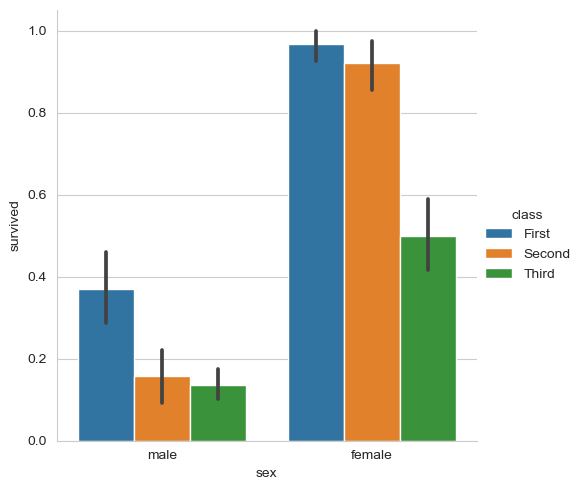

In [24]:
titanic = sns.load_dataset("titanic")
sns.catplot(data=titanic, x="sex", y="survived", hue="class", kind="bar")

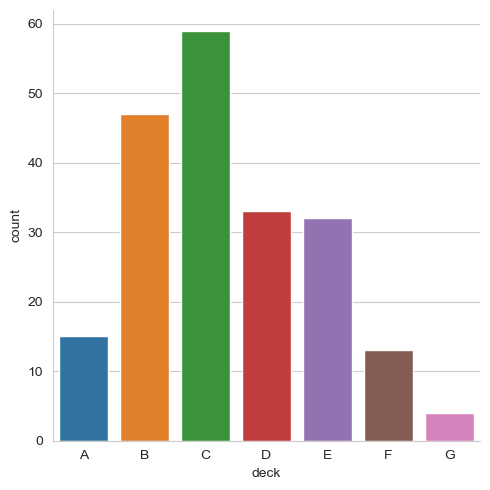

In [25]:
sns.catplot(data=titanic, x="deck", kind="count")

### Linear Regression

In [26]:
tips = sns.load_dataset("tips")

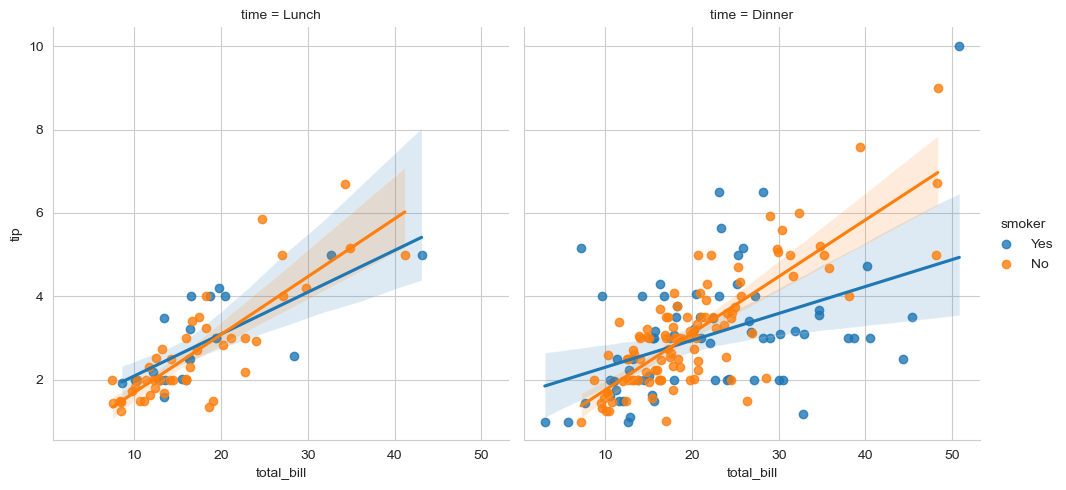

In [27]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time", hue="smoker")

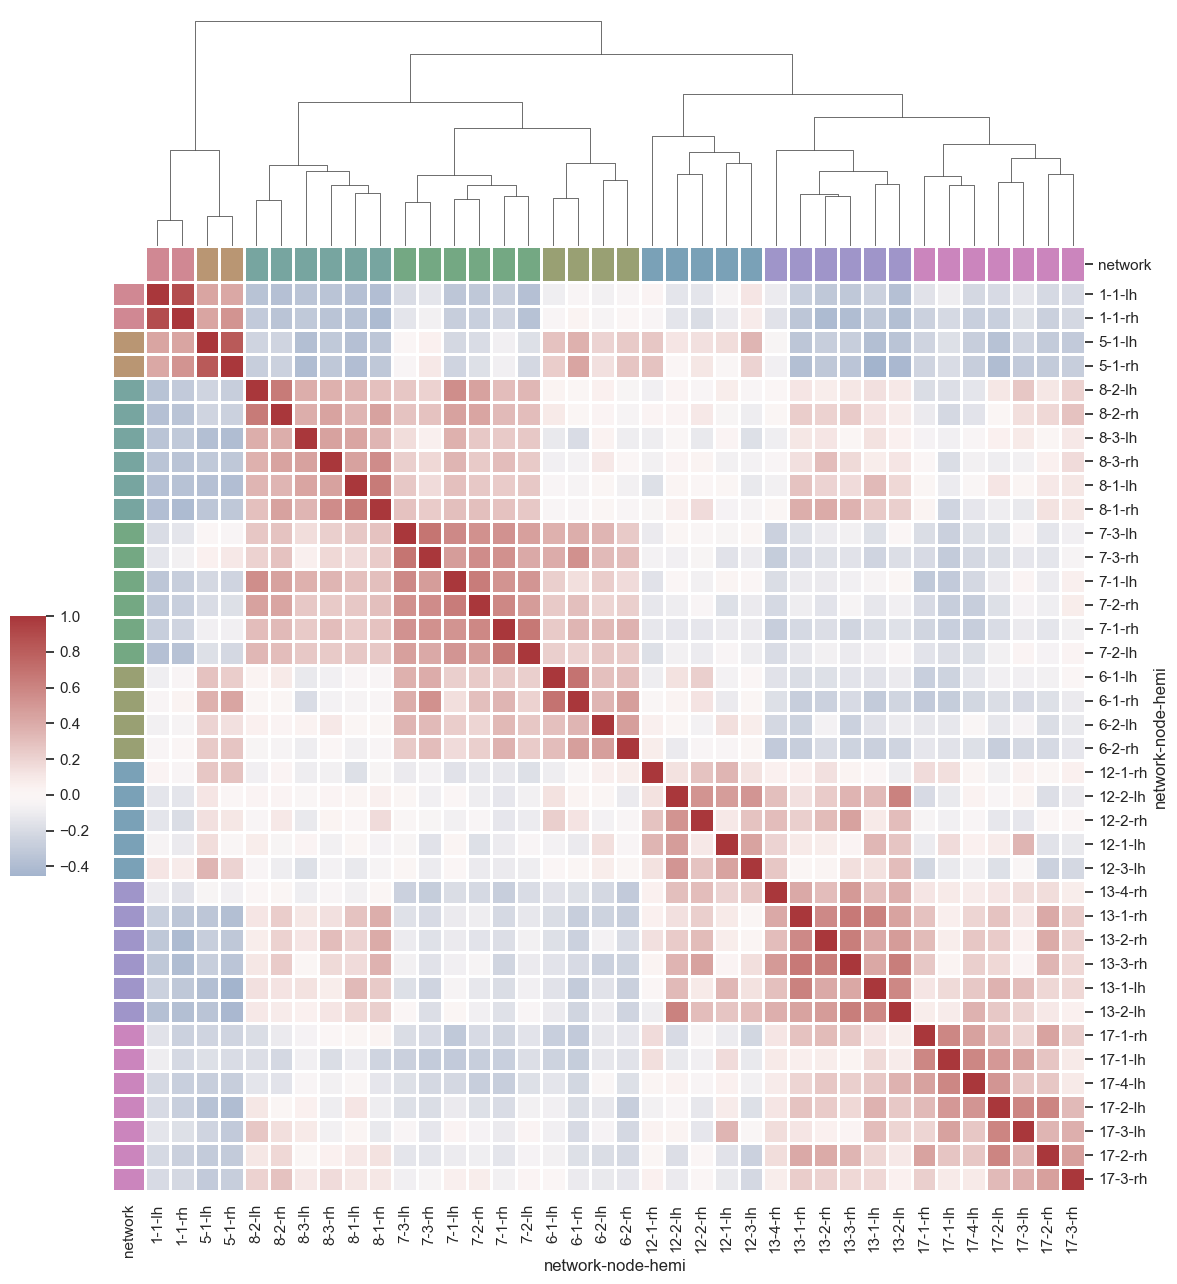

In [28]:
import pandas as pd
import seaborn as sns
sns.set_theme()

# Load the brain networks example dataset
df = sns.load_dataset("brain_networks", header=[0, 1, 2], index_col=0)

# Select a subset of the networks
used_networks = [1, 5, 6, 7, 8, 12, 13, 17]
used_columns = (df.columns.get_level_values("network")
                          .astype(int)
                          .isin(used_networks))
df = df.loc[:, used_columns]

# Create a categorical palette to identify the networks
network_pal = sns.husl_palette(8, s=.45)
network_lut = dict(zip(map(str, used_networks), network_pal))

# Convert the palette to vectors that will be drawn on the side of the matrix
networks = df.columns.get_level_values("network")
network_colors = pd.Series(networks, index=df.columns).map(network_lut)

# Draw the full plot
g = sns.clustermap(df.corr(), center=0, cmap="vlag",
                   row_colors=network_colors, col_colors=network_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

g.ax_row_dendrogram.remove()

In [2]:
df=sns.load_dataset('diamonds')
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
plt.style.use('ggplot')

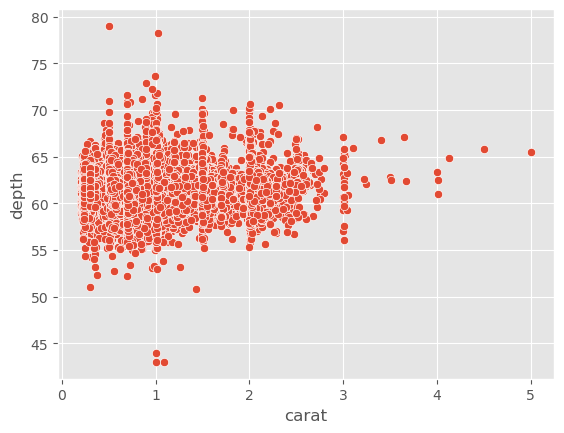

In [4]:
sns.scatterplot(
    data=df,
    x='carat',
    y='depth'
)
plt.show()

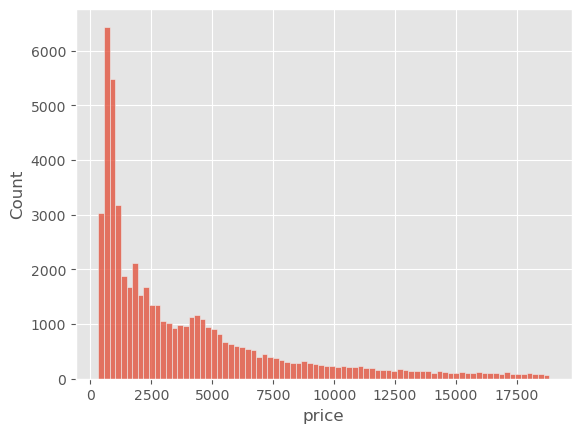

In [5]:
sns.histplot(
    data=df,
    x='price'
)
plt.show()

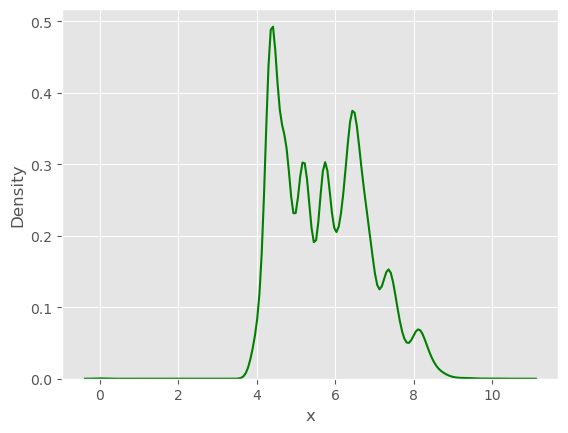

In [7]:
sns.kdeplot(
    data=df,
    x='x',
    color='green'
)
plt.show()

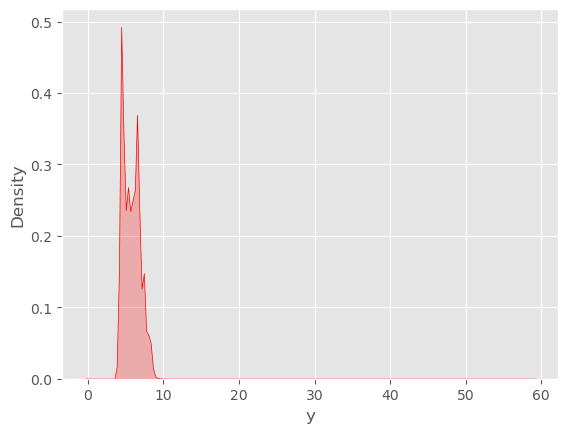

In [8]:
sns.kdeplot(df["y"], fill=True, color="red")
plt.show()

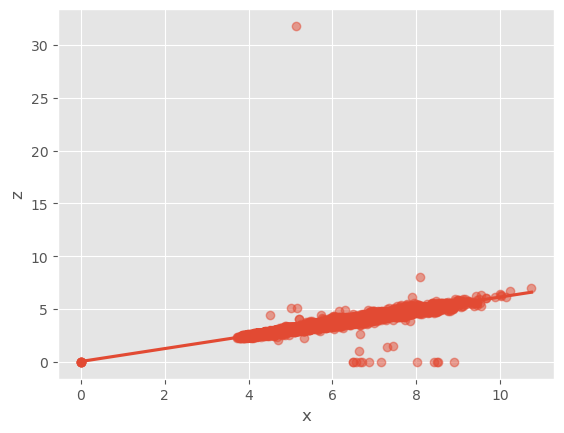

In [9]:
sns.regplot(data=df, x="x", y="z", scatter_kws={'alpha':0.5})
plt.show()


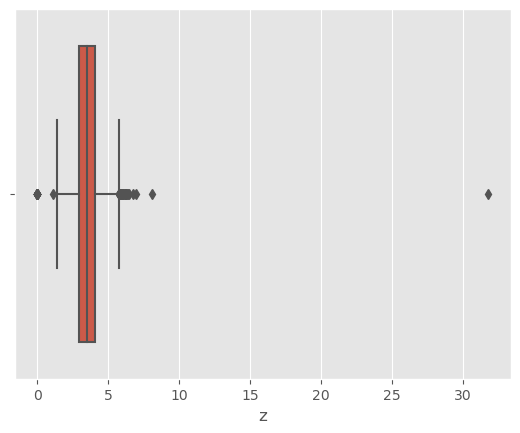

In [10]:
sns.boxplot(data=df, x="z")
plt.show()

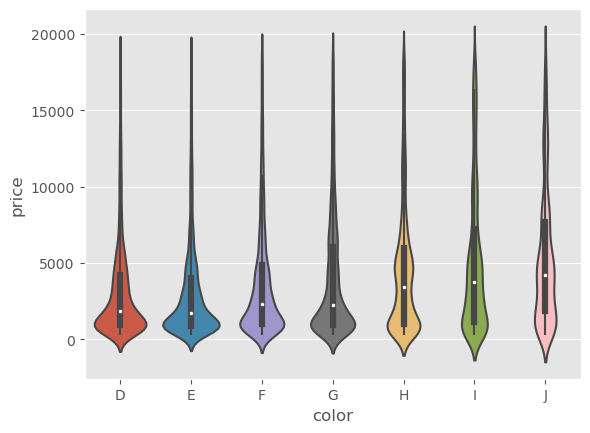

In [17]:
sns.violinplot(data=df, x="color", y="price", split=True)
plt.show()

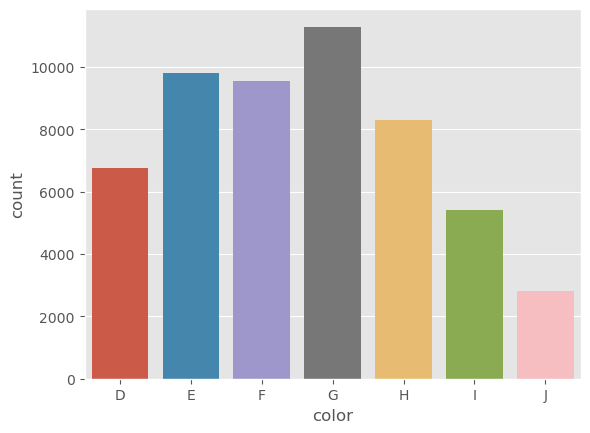

In [16]:
sns.countplot(data=df, x="color")
plt.show()


In [15]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


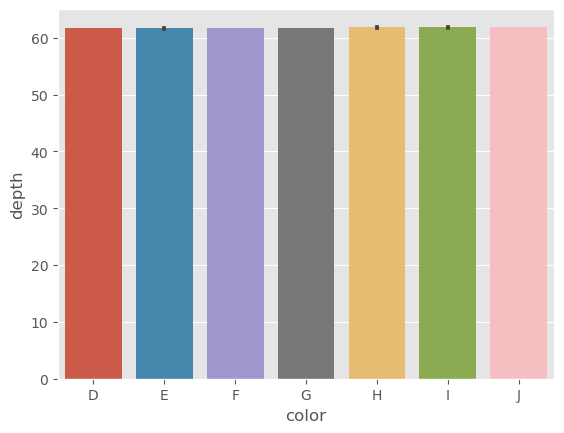

In [18]:
sns.barplot(data=df, x="color", y="depth")
plt.show()

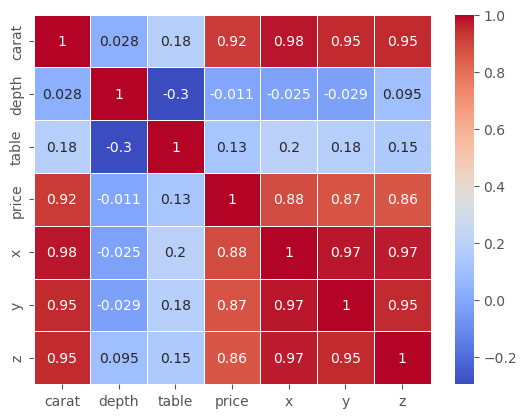

In [19]:
corr_matrix = df.corr(numeric_only=True) 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

In [21]:
print('abc')

abc
